In [1]:
import h5py
import numpy as np
import illustris_python as il
import matplotlib.pyplot as plt

In [2]:
f = h5py.File('../holodeck/data/illustris-galaxy-mergers_L75n1820FP_gas-100_dm-100_star-100_bh-000.hdf5','r')

In [3]:
fn = h5py.File('/orange/lblecha/Illustris/Illustris-1/output/galaxy-mergers_Illustris-1_gas-100_dm-100_star-100_bh-001.hdf5')

In [4]:
f.keys(), fn.keys()

(<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRadType', 'SubhaloLenType', 'SubhaloMassInHalfRadType', 'SubhaloMassInRadType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloVel', 'SubhaloVelDisp', 'shids_subf', 'shids_tree', 'snaps', 'time']>,
 <KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRadType', 'SubhaloLenType', 'SubhaloMassInHalfRadType', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloVel', 'SubhaloVelDisp', 'shids_subf', 'shids_tree', 'snaps', 'times']>)

In [5]:
for kk in f.attrs.keys():
    print(kk,f.attrs[kk])

box_volume_mpc 421875
created 2020-05-27 12:53:00.376217
min_parts [100 100 100   0]
num_mergers 2749
part_names ['gas' 'dm' 'star' 'bh']
part_types [0 1 4 5]
snapshot_scales [0.02093233 0.02194811 0.02301284 0.02401537 0.02518131 0.02640264
 0.02768396 0.02889004 0.03029202 0.03176216 0.03330336 0.03491864
 0.03644049 0.03820877 0.0400625  0.04200622 0.04383658 0.04596433
 0.04819509 0.05053312 0.05273427 0.05529444 0.05797774 0.06079027
 0.0634397  0.0665159  0.06974473 0.07312614 0.07667536 0.0800192
 0.08389966 0.08797396 0.0909372  0.09223901 0.09625751 0.09997701
 0.10092854 0.10582571 0.1109607  0.11634536 0.12141374 0.12491568
 0.12730583 0.13348283 0.13995997 0.14263707 0.1460579  0.15314405
 0.1605755  0.16678063 0.16836718 0.17653809 0.18422992 0.19316953
 0.1996845  0.20253985 0.21236833 0.22267252 0.2334812  0.24481003
 0.24949477 0.25668669 0.26787388 0.27954044 0.29034319 0.30155906
 0.31173042 0.32223762 0.33311126 0.34434076 0.35427073 0.36448462
 0.37499531 0.38399508

In [6]:
for kk in fn.attrs.keys():
    print(kk,fn.attrs[kk])

HubbleParam 0.704
Omega0 0.2726
OmegaLambda 0.7274
box_volume_mpch 421875.0
created 2024-03-18 15:22:24.883559
min_parts [100 100 100   1]
num_mergers 3104
part_names ['gas' 'dm' 'star' 'bh']
part_types [0 1 4 5]
snaptimes [0.0209323  0.02194802 0.02301301 0.02401562 0.02518095 0.02640282
 0.02768398 0.0288901  0.03029195 0.03176182 0.03330302 0.03491901
 0.03644033 0.03820854 0.04006256 0.04200654 0.04383665 0.04596376
 0.04819409 0.05053264 0.0527342  0.05529306 0.05797608 0.06078929
 0.0634377  0.06651593 0.06974353 0.07312774 0.07667616 0.08001672
 0.08389942 0.08797053 0.09093728 0.09223918 0.09625777 0.09997661
 0.10092855 0.10582597 0.11096103 0.11634526 0.12141409 0.12491542
 0.12730555 0.13348287 0.13995995 0.14263794 0.1460576  0.15314485
 0.16057599 0.1667797  0.16836772 0.17653754 0.18422877 0.19316822
 0.1996827  0.20254145 0.21236949 0.22267443 0.2334794  0.24480867
 0.24949284 0.25668768 0.26787083 0.2795412  0.29034102 0.30155808
 0.31172794 0.32224077 0.33310814 0.3443

In [7]:
ndm_new = fn['SubhaloLenType'][:,:,1]
ndm_old = f['SubhaloLenType'][:,1,:]
ngas_new = fn['SubhaloLenType'][:,:,0]
ngas_old = f['SubhaloLenType'][:,0,:]
nstar_new = fn['SubhaloLenType'][:,:,4]
nstar_old = f['SubhaloLenType'][:,2,:]
nbh_new = fn['SubhaloLenType'][:,:,5]
nbh_old = f['SubhaloLenType'][:,3,:]

h = fn.attrs['HubbleParam']
mbh_old = np.array(f['SubhaloBHMass'])/1.989e33
mbh_new = np.array(fn['SubhaloBHMass'])/h*1.0e10
print(mbh_old.shape, mbh_new.shape, h)
print(nbh_old.shape, nbh_new.shape)

(2749, 2) (3104, 3) 0.704
(2749, 2) (3104, 3)


In [8]:
mpt0_old = f['SubhaloMassInRadType'][:,0,:]/1.989e33
mpt0_new = fn['SubhaloMassInRadType'][:,:,0]/h*1.0e10
mpt1_old = f['SubhaloMassInRadType'][:,1,:]/1.989e33
mpt1_new = fn['SubhaloMassInRadType'][:,:,1]/h*1.0e10
mpt4_old = f['SubhaloMassInRadType'][:,2,:]/1.989e33
mpt4_new = fn['SubhaloMassInRadType'][:,:,4]/h*1.0e10
mpt5_old = f['SubhaloMassInRadType'][:,3,:]/1.989e33
mpt5_new = fn['SubhaloMassInRadType'][:,:,5]/h*1.0e10

In [9]:
qpt0_old = f['SubhaloMassInRadType'][:,0,0]/f['SubhaloMassInRadType'][:,0,1]
qpt0_old[qpt0_old>1.0] = 1.0/qpt0_old[qpt0_old>1.0]
qpt0_new = fn['SubhaloMassInRadType'][:,0,0]/fn['SubhaloMassInRadType'][:,1,0]
qpt0_new[qpt0_new>1.0] = 1.0/qpt0_new[qpt0_new>1.0]
qpt1_old = f['SubhaloMassInRadType'][:,1,0]/f['SubhaloMassInRadType'][:,1,1]
qpt1_old[qpt1_old>1.0] = 1.0/qpt1_old[qpt1_old>1.0]
qpt1_new = fn['SubhaloMassInRadType'][:,0,1]/fn['SubhaloMassInRadType'][:,1,1]
qpt1_new[qpt1_new>1.0] = 1.0/qpt1_new[qpt1_new>1.0]
qpt4_old = f['SubhaloMassInRadType'][:,2,0]/f['SubhaloMassInRadType'][:,2,1]
qpt4_old[qpt4_old>1.0] = 1.0/qpt4_old[qpt4_old>1.0]
qpt4_new = fn['SubhaloMassInRadType'][:,0,4]/fn['SubhaloMassInRadType'][:,1,4]
qpt4_new[qpt4_new>1.0] = 1.0/qpt4_new[qpt4_new>1.0]
qpt5_old = f['SubhaloMassInRadType'][:,3,0]/f['SubhaloMassInRadType'][:,3,1]
qpt5_old[qpt5_old>1.0] = 1.0/qpt5_old[qpt5_old>1.0]
qpt5_new = fn['SubhaloMassInRadType'][:,0,5]/fn['SubhaloMassInRadType'][:,1,5]
qpt5_new[qpt5_new>1.0] = 1.0/qpt5_new[qpt5_new>1.0]


/scratch/local/26160528/ipykernel_3727591/887071108.py:13: RuntimeWarning: divide by zero encountered in divide
  qpt5_old = f['SubhaloMassInRadType'][:,3,0]/f['SubhaloMassInRadType'][:,3,1]
/scratch/local/26160528/ipykernel_3727591/887071108.py:13: RuntimeWarning: invalid value encountered in divide
  qpt5_old = f['SubhaloMassInRadType'][:,3,0]/f['SubhaloMassInRadType'][:,3,1]
/scratch/local/26160528/ipykernel_3727591/887071108.py:15: RuntimeWarning: divide by zero encountered in divide
  qpt5_new = fn['SubhaloMassInRadType'][:,0,5]/fn['SubhaloMassInRadType'][:,1,5]


In [10]:
rpt0_old = f['SubhaloHalfmassRadType'][:,0,:]/3.09e21
rpt0_new = fn['SubhaloHalfmassRadType'][:,:,0]/h
rpt1_old = f['SubhaloHalfmassRadType'][:,1,:]/3.09e21
rpt1_new = fn['SubhaloHalfmassRadType'][:,:,1]/h
rpt4_old = f['SubhaloHalfmassRadType'][:,2,:]/3.09e21
rpt4_new = fn['SubhaloHalfmassRadType'][:,:,4]/h
rpt5_old = f['SubhaloHalfmassRadType'][:,3,:]/3.09e21
rpt5_new = fn['SubhaloHalfmassRadType'][:,:,5]/h

nbh_old: 1.0 42.0
mbh_old: 144688.21916364165 16568364216.409716
mpt5_old: 0.0 16526164121.72237
nbh_old: 1.0 5.0
mbh_old: 142105.32315042586 8468775570.647351
mpt5_old: 0.0 8468778109.8644085
nbh_new: 1 42
mbh_new: 144731.16038971057 16573281450.705095
mpt5_new: 0.0 16531068831.682205
nbh_new: 1 14
mbh_new: 142147.49781289854 8471288972.280243
mpt5_new: 0.0 8471291512.2509
nbh_new: 0 48
mbh_new: 0.0 17250354655.76432
mpt5_new: 0.0 17201783643.527466


/scratch/local/26160528/ipykernel_3727591/80842784.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(mpt5_old[:,0]),histtype='step',density=dens,bins=np.arange(5,10.5,0.5))
/scratch/local/26160528/ipykernel_3727591/80842784.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(mpt5_new[:,0]),histtype='step',density=dens,bins=np.arange(5,10.5,0.5))


(array([0.        , 0.01490603, 0.77705768, 0.50032404, 0.36228127,
        0.17887233, 0.09462087, 0.0492547 , 0.01749838, 0.00518471]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 [<matplotlib.patches.Polygon at 0x14b048553ee0>])

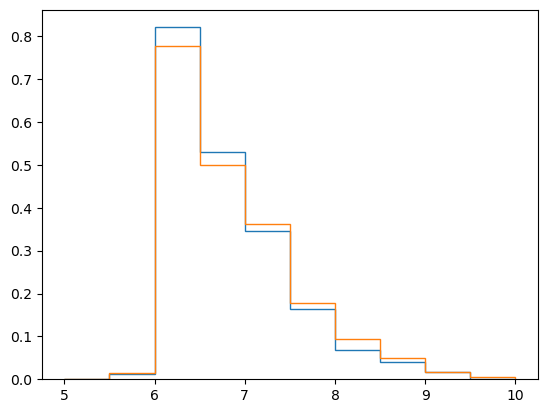

In [11]:
for i in range(2):
    print("nbh_old:", nbh_old[:,i].min(),nbh_old[:,i].max())
    print("mbh_old:", mbh_old[:,i].min(),mbh_old[:,i].max())
    print("mpt5_old:", mpt5_old[:,i].min(),mpt5_old[:,i].max())
for i in range(3):
    print("nbh_new:", nbh_new[:,i].min(),nbh_new[:,i].max())
    print("mbh_new:", mbh_new[:,i].min(),mbh_new[:,i].max())
    print("mpt5_new:", mpt5_new[:,i].min(),mpt5_new[:,i].max())
dens = True
plt.hist(np.log10(mpt5_old[:,0]),histtype='step',density=dens,bins=np.arange(5,10.5,0.5))
plt.hist(np.log10(mpt5_new[:,0]),histtype='step',density=dens,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt0_old[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt0_new[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt1_old[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt1_new[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt4_old[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))
#plt.hist(np.log10(mpt4_new[:,0]),histtype='step',density=dens) #,bins=np.arange(5,10.5,0.5))

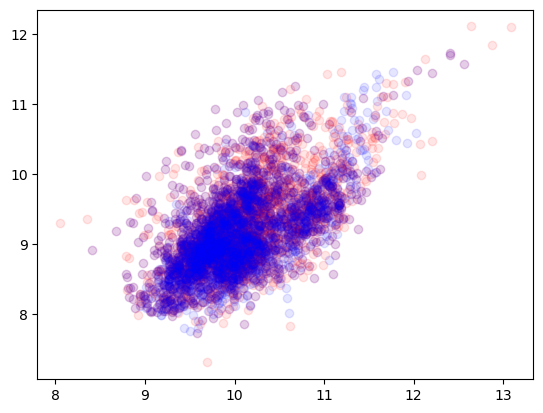

In [12]:
plt.scatter(np.log10(mpt1_new[:,1]),np.log10(mpt4_new[:,1]),alpha=0.1,color='r')
plt.scatter(np.log10(mpt1_old[:,1]),np.log10(mpt4_old[:,1]),alpha=0.1,color='b')


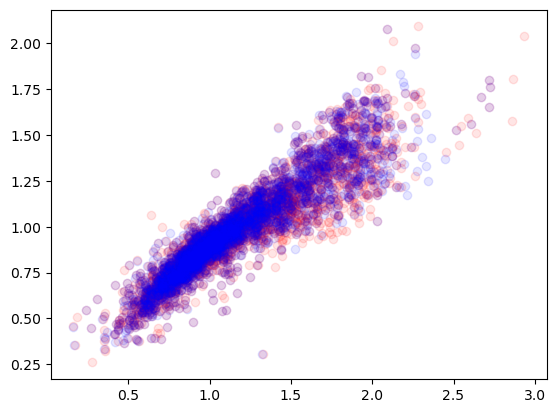

In [13]:
plt.scatter(np.log10(rpt0_new[:,1]),np.log10(rpt4_new[:,1]),alpha=0.1,color='r')
plt.scatter(np.log10(rpt0_old[:,1]),np.log10(rpt4_old[:,1]),alpha=0.1,color='b')


/scratch/local/26160528/ipykernel_3727591/2220233449.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(qpt0_new),np.log10(qpt5_new),alpha=0.1,color='r')
/scratch/local/26160528/ipykernel_3727591/2220233449.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(qpt0_old),np.log10(qpt5_old),alpha=0.1,color='b')


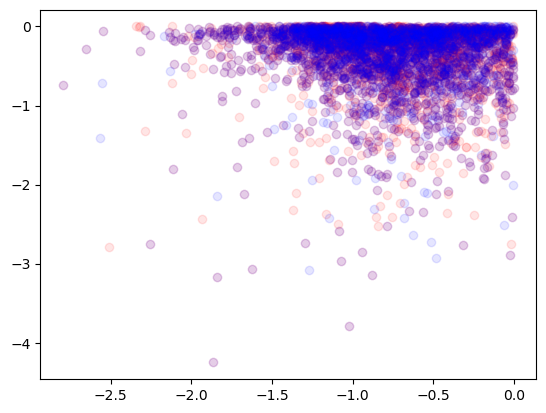

In [14]:
plt.scatter(np.log10(qpt0_new),np.log10(qpt5_new),alpha=0.1,color='r')
plt.scatter(np.log10(qpt0_old),np.log10(qpt5_old),alpha=0.1,color='b')


/scratch/local/26160528/ipykernel_3727591/2642006244.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(qpt5_old),histtype='step',bins=np.arange(-3.5,0,0.25),lw=2,density=True)
/scratch/local/26160528/ipykernel_3727591/2642006244.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(qpt5_new),histtype='step',bins=np.arange(-3.5,0,0.25),density=True)


(array([0.        , 0.00798403, 0.01862941, 0.01330672, 0.02927478,
        0.02129075, 0.06919494, 0.10379242, 0.18363273, 0.26347305,
        0.48968729, 1.06187625, 1.73785762]),
 array([-3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 ,
        -1.25, -1.  , -0.75, -0.5 , -0.25]),
 [<matplotlib.patches.Polygon at 0x14b03b940d60>])

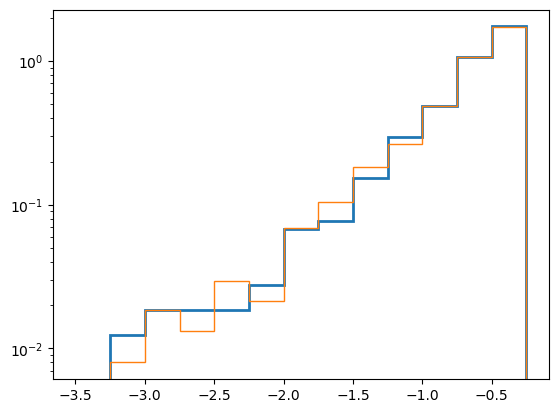

In [16]:
plt.yscale('log')
plt.hist(np.log10(qpt5_old),histtype='step',bins=np.arange(-3.5,0,0.25),lw=2,density=True)
plt.hist(np.log10(qpt5_new),histtype='step',bins=np.arange(-3.5,0,0.25),density=True)

In [ ]:
def compare_old_new(key,density=True,bins=None):
    val_old = np.array(f[key])
    val_new = np.array(fn[key])
    print(val_old.shape, val_new.shape)
    for i in range(2):
        print(val_old[:,i].min(),val_old[:,i].max())
    for i in range(3):
        print(val_new[:,i].min(),val_new[:,i].max())
    #plt.hist(np.log10(val_old[:,1]),histtype='step',density=True)
    #plt.hist(np.log10(val_new[:,1]),histtype='step',density=True)
    plt.hist(val_old[:,1],histtype='step',density=density,bins=bins)
    plt.hist(val_new[:,1],histtype='step',density=density,bins=bins)

In [ ]:
compare_old_new('snaps',density=True)

In [ ]:
plt.xscale('log'),plt.yscale('log')
compare_old_new('SubhaloGrNr',density=True,bins=10**np.arange(0,5,0.25))

In [ ]:
plt.xscale('log') #,plt.yscale('log')
compare_old_new('SubhaloSFR',density=False,bins=10**np.arange(-3.5,3.5,0.25))

In [ ]:
plt.xscale('log')
compare_old_new('shids_subf',density=False,bins=10**np.arange(2,18,0.5))

In [ ]:
print(fn['SubhaloMassType'][(nbh_new[:,2]==0.0),2,5].size)

In [ ]:
print(np.where(fn['SubhaloLenType'][:,2,4]<101)[0].size)

In [ ]:
fn['shids_subf'][(nbh_new[:,2]==0.0),:][:10],fn['snaps'][(nbh_new[:,2]==0.0),:][:10] #, nbh_new[nbh_new[:,2]==0,:][:10]

In [ ]:
for i in range(2):
    print(i,np.where(f['snaps'][:,i]==51)[0].shape)
    print(i,np.where(f['snaps'][:,i]==52)[0].shape)
    print(i,np.where(f['snaps'][:,i]==53)[0].shape)
    print(i,np.where(f['snaps'][:,i]==54)[0].shape)
print('new')
for i in range(3):
    print(i,np.where(fn['snaps'][:,i]==51)[0].shape)
    print(i,np.where(fn['snaps'][:,i]==52)[0].shape)
    print(i,np.where(fn['snaps'][:,i]==53)[0].shape)
    print(i,np.where(fn['snaps'][:,i]==54)[0].shape)

In [ ]:
fn['SubhaloLenType'][(nbh_new[:,2]>0.0)&(mbh_new[:,2]==0),:,0][1],fn['SubhaloMassType'][(nbh_new[:,2]>0.0)&(mbh_new[:,2]==0),:,0][1]

In [ ]:
f['SubhaloLenType'].shape, fn['SubhaloLenType'].shape

In [ ]:
print(ndm_new.min(), ndm_new.max())
print(ndm_old.min(), ndm_old.max())
print(ngas_new.min(), ngas_new.max())
print(ngas_old.min(), ngas_old.max())
print(nstar_new.min(), nstar_new.max())
print(nstar_old.min(), nstar_old.max())
print(nbh_new.min(), nbh_new.max())
print(nbh_old.min(), nbh_old.max())

In [ ]:
sublentype = f['SubhaloLenType']
print(sublentype.shape)
print(f['SubhaloMassInRadType'].shape)
#for at in sublentype.attrs:
#    print(at)
shids_subf = f['shids_subf']
print(shids_subf.shape)
print(shids_subf)


In [ ]:
print(sublentype[:,0,:].min())
print(sublentype[:,1,:].min())
print(sublentype[:,2,:].min())
print(sublentype[:,3,:].min())

In [ ]:
sublentype_new = fn['SubhaloLenType']
print(sublentype_new.shape)
print(sublentype_new[:,:,0].min())
print(sublentype_new[:,:,1].min())
print(sublentype_new[:,:,4].min())
print(sublentype_new[:,:,5].min())

In [ ]:
subids_old = np.array(f['shids_tree']).astype('uint64')
subids_new = np.array(fn['shids_tree']).astype('uint64')
combined = np.append(subids_old[:,:2],subids_new[:,:2])
print(combined.shape)
x=np.unique(combined)
print(x.shape)

In [ ]:
subids_old[:100], subids_new[:10]

In [ ]:
snaps_old = np.array(f['snaps'])
snaps_new = np.array(fn['snaps'])
print(snaps_old.shape, snaps_new.shape)
print(snaps_old.dtype, snaps_new.dtype)
print(snaps_old.min(), snaps_new.min())
print(subids_old[snaps_old[:,1]==98,0])
print(subids_new[snaps_new[:,1]==98,0])
print(np.where(snaps_old[:,0]==snaps_old[:,1])[0].size)
print(np.where(snaps_new[:,0]<snaps_new[:,1])[0].size)
print(np.where(snaps_new[:,1]==snaps_new[:,2])[0].size)

In [ ]:
mismatched_ids = np.array([]).astype('uint64')
count=0
print(subids_old.shape, subids_new.shape)
print(subids_old.dtype, subids_new.dtype)
for id in subids_old[:,1]:
    if np.any(subids_new[:,1] == id):
        print(id)
        continue
    else:
        count +=1
        mismatched_ids = np.append(id, mismatched_ids)
print(f"count={count}")
print(mismatched_ids)


In [ ]:
print(snaps[snaps[:,0]==snaps[:,1]].shape)
print(snaps[snaps[:,0]==1+snaps[:,1]].shape)
print(snaps[snaps[:,0]==snaps[:,1]-1].shape)

In [ ]:
ill_hdr = il.groupcat.loadHeader('/orange/lblecha/Illustris/Illustris-1/output', 134)
for k in ill_hdr.keys():
    print(k, ill_hdr[k])